In [325]:
from keras.engine.sequential import Sequential
# import dependencies
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import cv2 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import keras
from tensorflow.keras.utils import to_categorical
import random
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam

In [326]:
# load data set and split it to test and train

(x_train,y_train) , (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(60000,)


As we can see above, we have 60_000 handwritten digits, each 28 * 28.

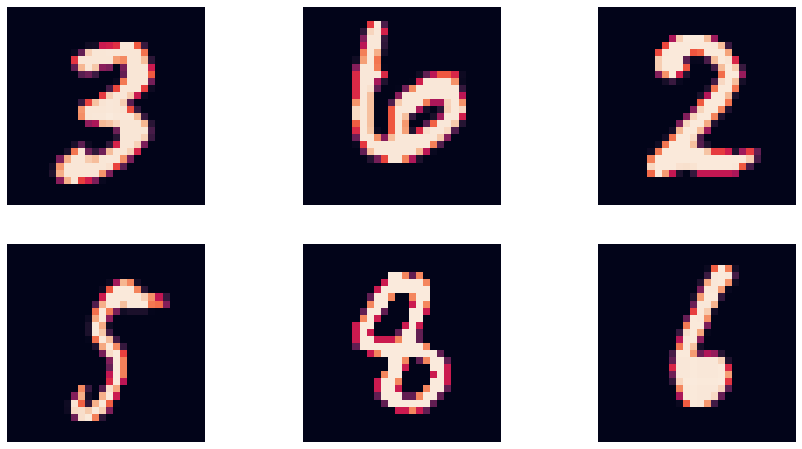

In [327]:
#see some random samples of the dataset to get a sense
for i in range(6):
    random_number= random.randint(0,x_train.shape[0])
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(x_train[random_number])

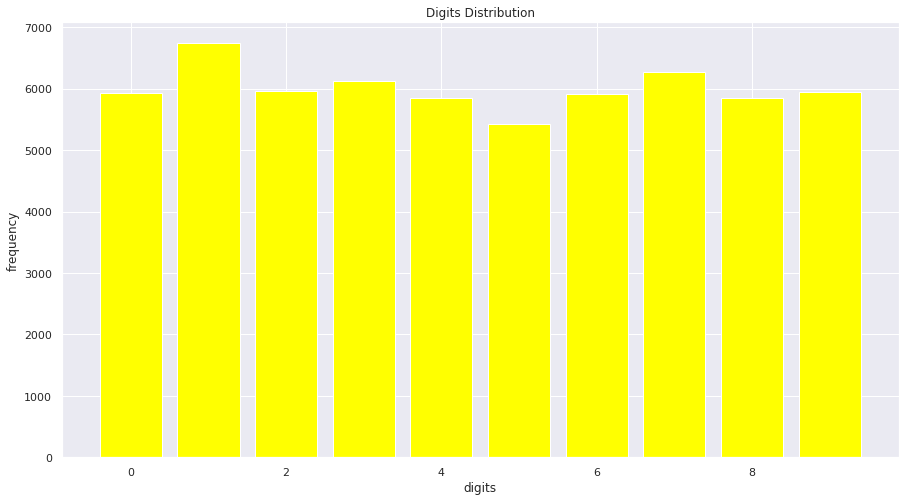

In [328]:
#visualize the distribution of the trainset digits
labels_dictionary = {}
for i in range(y_train.shape[0]):
    if y_train[i] in labels_dictionary:
        labels_dictionary[y_train[i]] += 1
    else:
        labels_dictionary[y_train[i]] = 1

plt.bar(labels_dictionary.keys(), labels_dictionary.values(), color ='yellow', width = 0.8)
plt.xlabel("digits")
plt.ylabel("frequency")
plt.title("Digits Distribution")
plt.show()

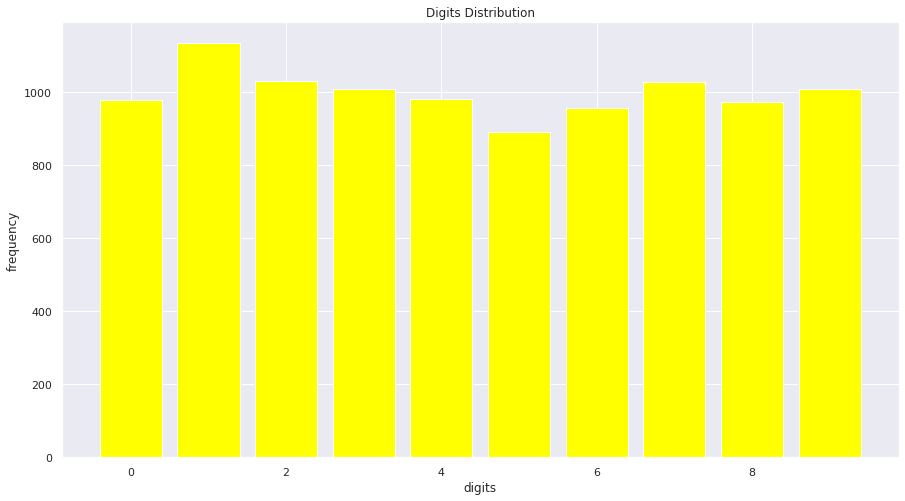

In [329]:
#visualize the distribution of the test set digits

labels_dictionary = {}
for i in range(y_test.shape[0]):
    if y_test[i] in labels_dictionary:
        labels_dictionary[y_test[i]] += 1
    else:
        labels_dictionary[y_test[i]] = 1

plt.bar(labels_dictionary.keys(), labels_dictionary.values(), color ='yellow', width = 0.8)
plt.xlabel("digits")
plt.ylabel("frequency")
plt.title("Digits Distribution")
plt.show()

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


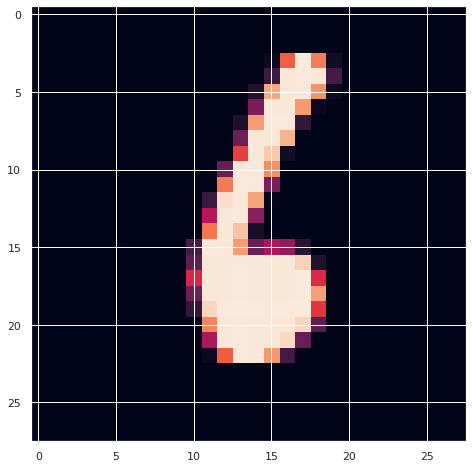

In [330]:
plt.imshow(x_train[random_number])
print(y_train[random_number])

#convert a dataset from 3 channels to single channel to feed the neural network
# x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
# x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

# cast the tardet set to categorical(one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print(x_train[random_number])
print(y_train[random_number])

In [331]:
#normalizing dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255.0
x_test = x_test /255.0

In [332]:
# #build a baseline model
model = Sequential()
model.add(Dense(10, input_dim = 784, activation = 'relu'))
model.add(Dense(30, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [333]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                7850      
                                                                 
 dense_41 (Dense)            (None, 30)                330       
                                                                 
 flatten_6 (Flatten)         (None, 30)                0         
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_42 (Dense)            (None, 10)                310       
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-train

In [334]:
# # compile model
# opt = SGD(learning_rate=0.01, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(Adam(lr=0.01), #lr: learning rate
                loss='categorical_crossentropy', #loss function
               metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train and Validation Phase

In [335]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.9118 - accuracy: 0.6982 - val_loss: 0.4054 - val_accuracy: 0.8893
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5993 - accuracy: 0.8263 - val_loss: 0.3574 - val_accuracy: 0.9052
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5355 - accuracy: 0.8481 - val_loss: 0.3799 - val_accuracy: 0.8963
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.8579 - val_loss: 0.3399 - val_accuracy: 0.9132
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.4904 - accuracy: 0.8633 - val_loss: 0.3635 - val_accuracy: 0.9058
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.4709 - accuracy: 0.8687 - val_loss: 0.3342 - val_accuracy: 0.9118
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.8715 - val_loss: 0.3416 - val_accuracy: 0.9142
Epoch 

In [336]:
model.save('MNIST_model_1')

INFO:tensorflow:Assets written to: MNIST_model_1/assets


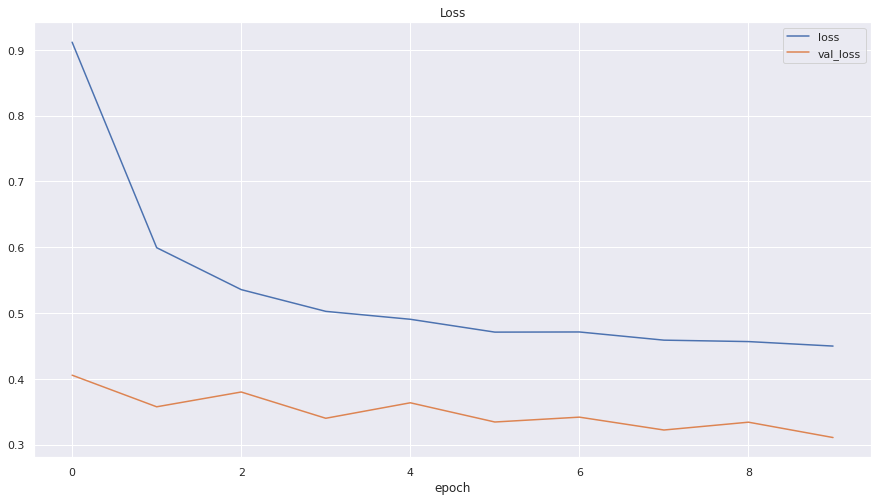

In [337]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
print(history)

In [338]:
print(history.history['loss'])
print("Lowest Loss Value:   ",min(history.history['loss']))
print("Last Loss Value:     ",history.history['loss'][-1])

[0.9117755889892578, 0.59930419921875, 0.5355488061904907, 0.5024864077568054, 0.4904426336288452, 0.47090595960617065, 0.47114014625549316, 0.45869192481040955, 0.45652520656585693, 0.4496876001358032]
Lowest Loss Value:    0.4496876001358032
Last Loss Value:      0.4496876001358032


In [339]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epoch')

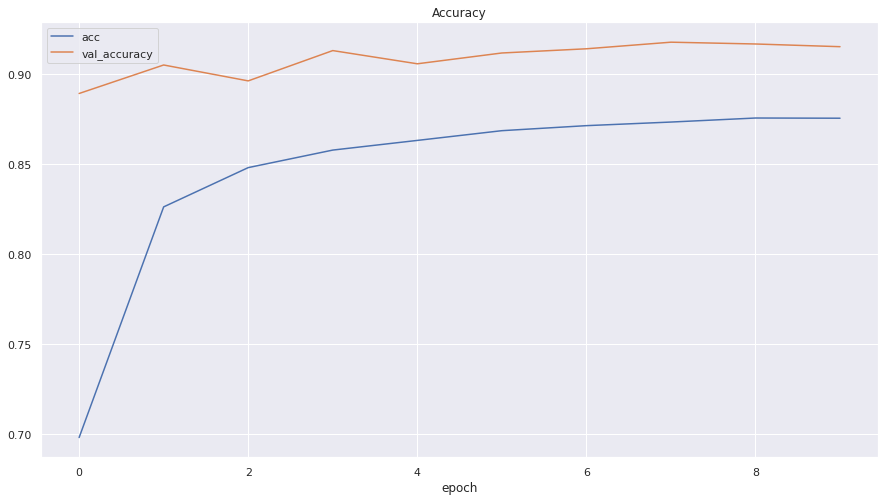

In [340]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [341]:
print(history.history['accuracy'])
print("Highest Accuracy Value:   ",max(history.history['accuracy']))
print("Last Accuracy Value:     ",history.history['accuracy'][-1])

[0.6981852054595947, 0.8263333439826965, 0.8481481671333313, 0.8578888773918152, 0.8632592558860779, 0.8686666488647461, 0.8714629411697388, 0.873462975025177, 0.8757036924362183, 0.8755925893783569]
Highest Accuracy Value:    0.8757036924362183
Last Accuracy Value:      0.8755925893783569


Prediction Phase

In [342]:
#matrix of softmax probabilities for each image in test set
soft_max_probabilities = model.predict(x_test)
# print(soft_max_probabilities)
predicted_labels=[]
for row in range(x_test.shape[0]):
    predicted_label = np.argmax(soft_max_probabilities[row])
    predicted_labels.append(predicted_label)
print(predicted_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 2, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 0, 7, 8, 4, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 8, 7, 7, 6, 2, 7, 8, 4, 7, 5, 6, 1, 3, 6, 9, 3, 1, 4, 1, 2, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 5, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 9, 9, 2, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 9, 6, 7, 3, 1, 7, 1, 8, 2, 0, 8, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 3, 3, 2, 3, 1, 8, 1, 8, 1, 8, 5, 0, 8, 4, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 5, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 2, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 2, 9, 2, 0, 9, 1, 1, 2, 1, 

In [343]:
ground_truth_labels = [] 
for row in range(y_test.shape[0]):
    ground_trouth_label = np.argmax(y_test[row])
    ground_truth_labels.append(ground_trouth_label)
print(ground_truth_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [344]:
model=keras.models.load_model('MNIST_model_1')

In [345]:
cm = confusion_matrix(ground_truth_labels,predicted_labels)
print(cm)

[[ 938    0   12    0    0    3   18    5    4    0]
 [   0 1112    1    3    0    1    3    0   12    3]
 [   7    3  911   11    4    1   19   10   62    4]
 [   2    0   54  806    0  107    0   13   21    7]
 [   0    0    5    0  871    0   28    3   12   63]
 [  12    0    6   36    5  737   32    1   52   11]
 [  11    3   12    0    7    8  906    0   11    0]
 [   2    2   26    6   12    0    0  926   10   44]
 [   6    2   12    6    4   13   23    3  893   12]
 [   2    5    2    8   45   10    4   15   14  904]]


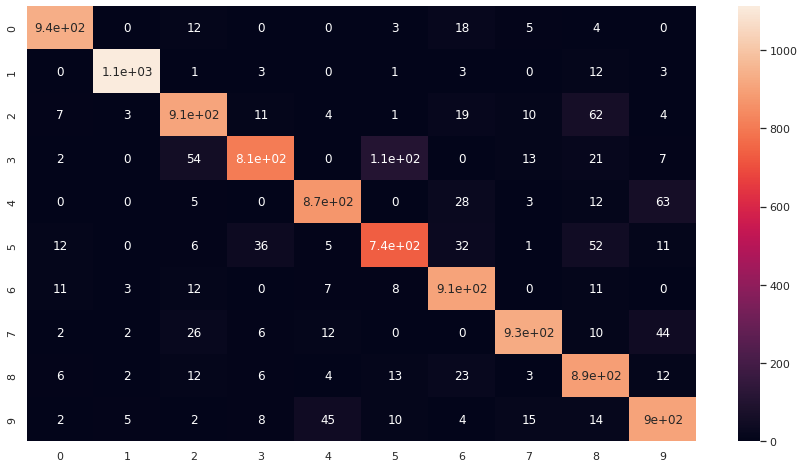

In [346]:
# plot the heatmap
sns.set(rc = {'figure.figsize':(15,8)})
f = sns.heatmap(cm, annot=True)

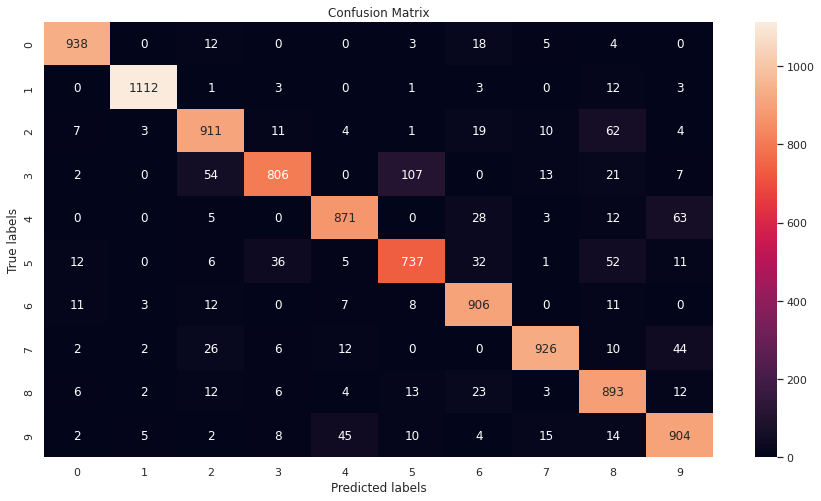

In [347]:
#plot the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 